In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

data_all=pd.read_csv('data/commits_all.csv')
df = data_all.copy()

In [2]:
df

,sha,author,date,committer,message,comment_count
0,d928a5cc222be5968b2f1f8a5f8d02977a8d6c2d,Luke Manley,2024-01-25T16:25:03Z,GitHub,REGR: perf regression in Series.combine_first ...,0
1,736868671044605b0f2c2cc23ab5ea09fbc9a2ac,Matthew Roeschke,2024-01-25T01:01:42Z,GitHub,COMPAT: Make argsort compatable with numpy 2.0...,0
2,aaa276043223821bf743e51b373148b41cbf857d,Matthew Roeschke,2024-01-24T22:36:47Z,GitHub,BUG: Series.pct_change with empty Series (#57058),0
3,622f31c9c455c64751b03b18e357b8f7bd1af0fd,Luke Manley,2024-01-24T02:52:01Z,GitHub,PERF: Index.join to maintain cached attributes...,0
4,3c96b8ff6d399fbec8d4d533e8e8618c592bb64b,Luke Manley,2024-01-23T18:02:27Z,GitHub,PERF: StringEngine for string dtype indexing o...,0
...,...,...,...,...,...,...
26995,b0c290f4879a542b027b4c36a922f5ae2216ed5a,John McNamara,2013-09-16T19:54:02Z,John McNamara,ENH: Added xlsxwriter as an ExcelWriter option...,0
26996,ebfb4c8a91d8d566317d9a973f827a165d15e4ae,Jeff Tratner,2013-09-22T22:17:09Z,Jeff Tratner,Merge pull request #4909 from jtratner/add-is_...,0
26997,0ea6de50cd2657ed0d77b10135d69067160422b8,Jeffrey Tratner,2013-09-18T02:30:53Z,Jeffrey Tratner,ENH: Add 'is_' method to Index for identity ch...,0
26998,0eab18794b95b243cf7df401e674626dadb27314,jreback,2013-09-22T19:28:16Z,jreback,Merge pull request #4938 from jreback/panel_co...,0


In [3]:
df['date'] = pd.to_datetime(df['date'])

df

,sha,author,date,committer,message,comment_count
0,d928a5cc222be5968b2f1f8a5f8d02977a8d6c2d,Luke Manley,2024-01-25 16:25:03+00:00,GitHub,REGR: perf regression in Series.combine_first ...,0
1,736868671044605b0f2c2cc23ab5ea09fbc9a2ac,Matthew Roeschke,2024-01-25 01:01:42+00:00,GitHub,COMPAT: Make argsort compatable with numpy 2.0...,0
2,aaa276043223821bf743e51b373148b41cbf857d,Matthew Roeschke,2024-01-24 22:36:47+00:00,GitHub,BUG: Series.pct_change with empty Series (#57058),0
3,622f31c9c455c64751b03b18e357b8f7bd1af0fd,Luke Manley,2024-01-24 02:52:01+00:00,GitHub,PERF: Index.join to maintain cached attributes...,0
4,3c96b8ff6d399fbec8d4d533e8e8618c592bb64b,Luke Manley,2024-01-23 18:02:27+00:00,GitHub,PERF: StringEngine for string dtype indexing o...,0
...,...,...,...,...,...,...
26995,b0c290f4879a542b027b4c36a922f5ae2216ed5a,John McNamara,2013-09-16 19:54:02+00:00,John McNamara,ENH: Added xlsxwriter as an ExcelWriter option...,0
26996,ebfb4c8a91d8d566317d9a973f827a165d15e4ae,Jeff Tratner,2013-09-22 22:17:09+00:00,Jeff Tratner,Merge pull request #4909 from jtratner/add-is_...,0
26997,0ea6de50cd2657ed0d77b10135d69067160422b8,Jeffrey Tratner,2013-09-18 02:30:53+00:00,Jeffrey Tratner,ENH: Add 'is_' method to Index for identity ch...,0
26998,0eab18794b95b243cf7df401e674626dadb27314,jreback,2013-09-22 19:28:16+00:00,jreback,Merge pull request #4938 from jreback/panel_co...,0


In [4]:
#设置一列为commit_count
df['commit_count'] = 1
df['hour'] = df['date'].dt.hour
df_hour = df.drop(['sha','author','comment_count','committer','message','date'], axis=1)
df_grouped = df_hour.groupby('hour').agg({'commit_count': 'sum'}).reset_index()
df_grouped


,hour,commit_count
0,0,1338
1,1,1150
2,2,874
3,3,471
4,4,271
5,5,160
6,6,170
7,7,316
8,8,388
9,9,462


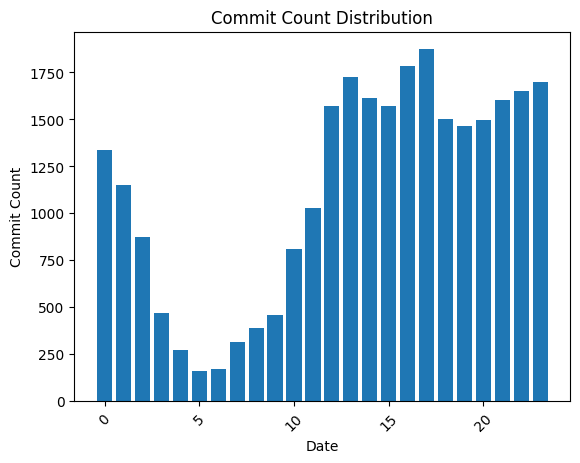

In [5]:
# 绘制直方图
plt.bar(df_grouped['hour'], df_grouped['commit_count'], width=0.8)

# 设置标题和标签
plt.title('Commit Count Distribution')
plt.xlabel('Date')
plt.ylabel('Commit Count')

# 设置刻度标记的格式
plt.xticks(rotation=45)

# 显示图表
plt.show()

df= df.drop('hour', axis=1)

In [6]:
#只保留日期，删除时间
df['date'] = df['date'].dt.date

df_time = df.drop(['sha','author','comment_count','committer','message'], axis=1)

df_grouped = df_time.groupby('date').agg({'commit_count': 'sum'}).reset_index()
# 打印结果
print(df_grouped)

            date  commit_count
0     2013-03-15             1
1     2013-05-02             1
2     2013-05-03             1
3     2013-06-10             1
4     2013-06-23             1
...          ...           ...
3552  2024-01-21             1
3553  2024-01-22            10
3554  2024-01-23             7
3555  2024-01-24             2
3556  2024-01-25             2

[3557 rows x 2 columns]


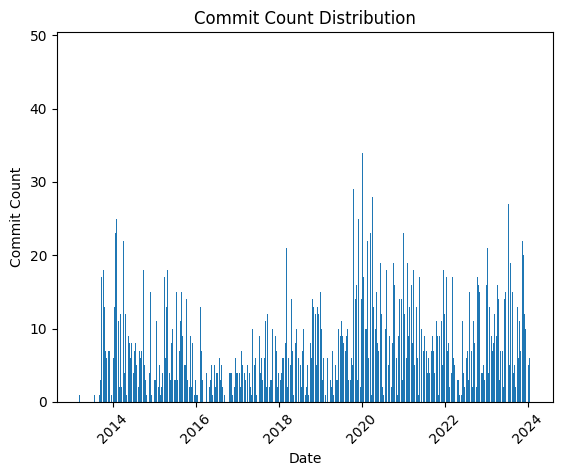

In [7]:
# 绘制直方图
plt.bar(df_grouped['date'], df_grouped['commit_count'], width=0.8)

# 设置标题和标签
plt.title('Commit Count Distribution')
plt.xlabel('Date')
plt.ylabel('Commit Count')

# 设置刻度标记的格式
plt.xticks(rotation=45)

# 显示图表
plt.show()

In [8]:
df['date'] = pd.to_datetime(df['date'])
# 提取年份
df['year'] = df['date'].dt.year
# 按年份进行分组并计算每个年份的总和
df['year_count'] = 1
df_year = df.drop(['sha','author','comment_count','committer','message','date','commit_count'], axis=1)
df_grouped2 = df_year.groupby('year').agg({'year_count': 'sum'}).reset_index()
df_grouped2

,year,year_count
0,2013,878
1,2014,3081
2,2015,2049
3,2016,1302
4,2017,1772
5,2018,2301
6,2019,2716
7,2020,4151
8,2021,3157
9,2022,2434


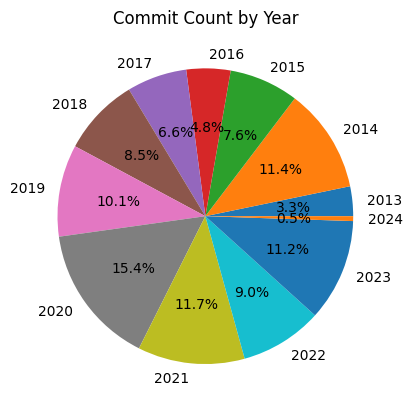

In [9]:
plt.pie(df_grouped2['year_count'], labels=df_grouped2['year'], autopct='%1.1f%%')
plt.title('Commit Count by Year')
plt.show()

In [10]:
#设置一列为commit_count
df_author = df.drop(['sha','year','comment_count','committer','message','year_count','date'], axis=1)
df_grouped3 = df_author.groupby('author').agg({'commit_count': 'sum'}).reset_index()
df_grouped3

,author,commit_count
0,1_x7,1
1,21CSM,1
2,3553x,1
3,3vts,9
4,5j9,1
...,...,...
3285,Ádám Lippai,2
3286,Åsmund Hjulstad,1
3287,Štěpán Műller,1
3288,颜发才（Yan Facai）,1


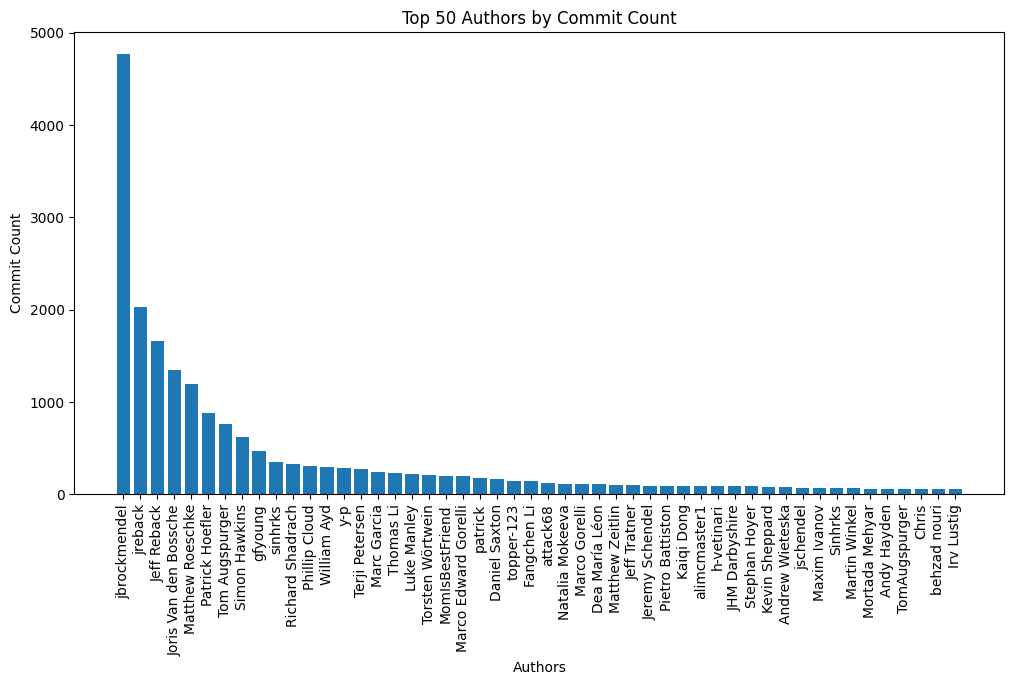

In [11]:
# 按提交次数降序排序，并选择前50名作者
# 作者的活跃程度
top50_authors = df_grouped3.sort_values(by='commit_count', ascending=False).head(50)

# 绘制直方图
plt.figure(figsize=(12, 6))
plt.bar(top50_authors['author'], top50_authors['commit_count'])
plt.xticks(rotation=90)
plt.xlabel('Authors')
plt.ylabel('Commit Count')
plt.title('Top 50 Authors by Commit Count')
plt.show()

In [12]:

# 计算提交次数的最大值、最小值和平均值
max_commits = df_grouped3['commit_count'].max()
min_commits = df_grouped3['commit_count'].min()
mean_commits = df_grouped3['commit_count'].mean()

# 输出结果
print('Max commits:', max_commits)
print('Min commits:', min_commits)
print('Mean commits:', mean_commits)


Max commits: 4767
Min commits: 1
Mean commits: 8.206686930091186


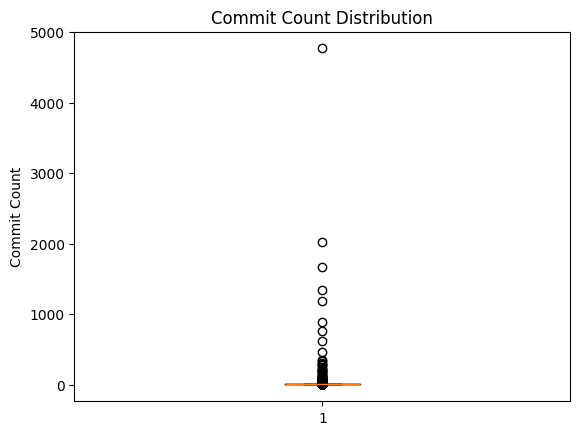

In [13]:
# 提取提交次数数据
commit_counts = df_grouped3['commit_count']

# 创建箱线图
plt.boxplot(commit_counts)
plt.title('Commit Count Distribution')
plt.ylabel('Commit Count')
plt.show()

C:\Users\CZTX\AppData\Local\Temp\ipykernel_21116\3067909515.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bug_count = df['message'].str.contains(r'\b(bug|fix|error)\b', flags=re.IGNORECASE).sum()
C:\Users\CZTX\AppData\Local\Temp\ipykernel_21116\3067909515.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  feature_count = df['message'].str.contains(r'\b(feature|feat|enh|enhancement)\b', flags=re.IGNORECASE).sum()
C:\Users\CZTX\AppData\Local\Temp\ipykernel_21116\3067909515.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  perf_count = df['message'].str.contains(r'\b(refactor|perf)\b', flags=re.IGNORECASE).sum()
C:\Users\CZTX\AppData\Local\Temp\ipykernel_21116\3067909515.py:13: UserWarning: This pattern is interprete

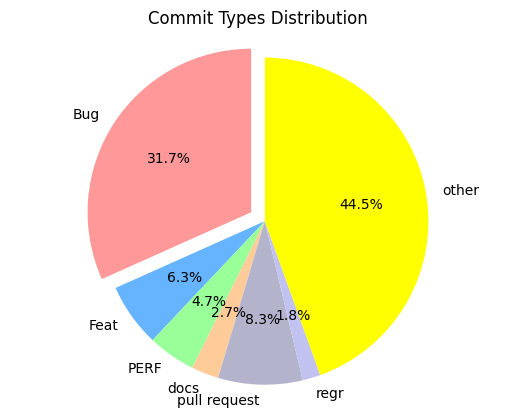

In [18]:
import re

# 统计包含"bug"、"fix"、"error"的出现次数，表示修复bug的commit
bug_count = df['message'].str.contains(r'\b(bug|fix|error)\b', flags=re.IGNORECASE).sum()

# 统计包含"feature"、"enh"的出现次数，表示添加新功能的commit
feature_count = df['message'].str.contains(r'\b(feature|feat|enh|enhancement)\b', flags=re.IGNORECASE).sum()

# 包含refactor|perf的次数,表示优化
perf_count = df['message'].str.contains(r'\b(refactor|perf)\b', flags=re.IGNORECASE).sum()

# 表示文档相关的commit，如更新文档、添加注释等
docs_count = df['message'].str.contains(r'\b(docs)\b', flags=re.IGNORECASE).sum()

# pull request，表示
pull_count = df['message'].str.contains(r'\b(pull request)\b', flags=re.IGNORECASE).sum()

# 表示对于已经修复的bug或问题，在后续的版本或发布中再次出现的情况
regr_count = df['message'].str.contains(r'\b(regr|regression)\b', flags=re.IGNORECASE).sum()

#其他
other_count = df.shape[0] - bug_count-feature_count-perf_count-docs_count-pull_count-regr_count

# 输出结果
#print("包含 bug、fix、error 的次数:", bug_count)

# 绘制饼图
labels = ['Bug', 'Feat', 'PERF', 'docs', 'pull request','regr','other']
sizes = [bug_count, feature_count, perf_count, docs_count, pull_count,regr_count,other_count]
explode = (0.1, 0, 0, 0, 0,0,0)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#b3b3cc', '#c2c2f0','yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Commit Types Distribution')
plt.show()

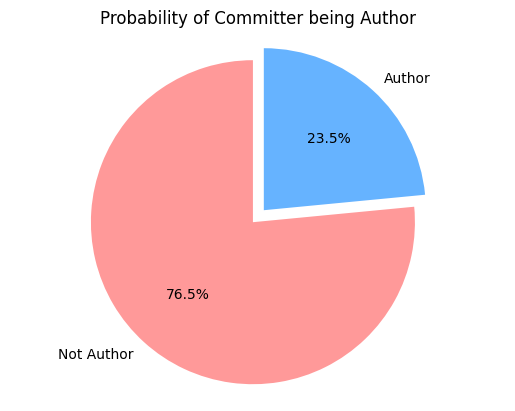

In [15]:
# 计算committer是否是author的概率
is_author = df['committer'] == df['author']
probability = is_author.value_counts(normalize=True) * 100

# 绘制饼图
labels = ['Not Author', 'Author']
sizes = probability.values
explode = (0, 0.1)
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Probability of Committer being Author')
plt.show()

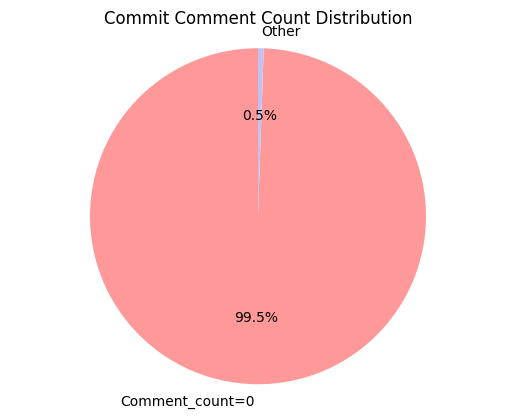

In [16]:
# 统计不同comment_count值的commit数量
count_0 = len(df[df['comment_count'] == 0])
count_other = len(df[df['comment_count'] > 0])

# 绘制饼图
labels = ['Comment_count=0', 'Other']
sizes = [count_0, count_other]
colors = ['#ff9999',  '#c2c2f0']
explode = (0,  00)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Commit Comment Count Distribution')
plt.show()